In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10-annual-best-selling-albums-by-length/Top 10 Albums By Year Tracks - Album Length.csv
/kaggle/input/top-10-annual-best-selling-albums-by-length/Top 10 Albums By Year Album Length - Sheet1.csv


# Loading Data

In [2]:
data_track = pd.read_csv('/kaggle/input/top-10-annual-best-selling-albums-by-length/Top 10 Albums By Year Tracks - Album Length.csv')
data_length = pd.read_csv('/kaggle/input/top-10-annual-best-selling-albums-by-length/Top 10 Albums By Year Album Length - Sheet1.csv')

In [3]:
print(data_track.shape) #행,열 확인
print("-----------")
print(data_track.dtypes) # 데이터들의 타입 확인
print("-----------")
print(data_track.describe()) # 데이터들의 통계량 확인
print("-----------")
print(data_track.info()) #데이터들의 타입, 결측치 등 확인
print("-----------")
print(data_track.isnull()) #결측치 확인

(320, 9)
-----------
Year                       int64
Ranking                    int64
Artist                    object
Album                     object
Worldwide Sales (Est.)    object
CDs                        int64
Tracks                     int64
Album Length              object
Genre                     object
dtype: object
-----------
              Year    Ranking         CDs      Tracks
count   320.000000  320.00000  320.000000  320.000000
mean   2005.500000    5.50000    1.043750   14.306250
std       9.247553    2.87678    0.246528    5.868995
min    1990.000000    1.00000    1.000000    6.000000
25%    1997.750000    3.00000    1.000000   12.000000
50%    2005.500000    5.50000    1.000000   13.000000
75%    2013.250000    8.00000    1.000000   15.000000
max    2021.000000   10.00000    4.000000   67.000000
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
--

In [4]:
print(data_length.shape) #행,열 확인
print("-----------")
print(data_length.dtypes) # 데이터들의 타입 확인
print("-----------")
print(data_length.describe()) # 데이터들의 통계량 확인
print("-----------")
print(data_length.info()) #데이터들의 타입, 결측치 등 확인
print("-----------")
print(data_length.isnull()) #결측치 확인

(320, 12)
-----------
Year                        int64
Ranking                     int64
Artist                     object
Album                      object
Worldwide Sales (Est.)     object
CDs                         int64
Tracks                      int64
Album Length               object
Hours                     float64
Minutes                   float64
Seconds                     int64
Genre                      object
dtype: object
-----------
              Year    Ranking         CDs      Tracks       Hours     Minutes  \
count   320.000000  320.00000  320.000000  320.000000  320.000000  320.000000   
mean   2005.500000    5.50000    1.043750   14.306250    0.941406   56.478500   
std       9.247553    2.87678    0.246528    5.868995    0.382895   22.970109   
min    1990.000000    1.00000    1.000000    6.000000    0.320000   19.430000   
25%    1997.750000    3.00000    1.000000   12.000000    0.740000   44.137500   
50%    2005.500000    5.50000    1.000000   13.000000    0

In [5]:
data_track.head()

,Year,Ranking,Artist,Album,Worldwide Sales (Est.),CDs,Tracks,Album Length,Genre
0,2014,4,Hozier,Hozier,"4,413,503",1,13,0:53:26,Blues
1,1990,10,The Three Tenors,Carreras Domingo Pavarotti In Concert 1990,"8,533,000",1,17,1:07:55,Classical
2,1997,3,Movie Soundtrack,Titanic,"30,000,000",1,15,1:12:31,Classical
3,1997,4,Andrea Bocelli,Romanza,"20,000,000",1,15,1:10:13,Classical
4,2009,9,Andrea Bocelli,My Christmas,"4,060,000",1,15,0:59:17,Classical


In [6]:
data_length.head()

,Year,Ranking,Artist,Album,Worldwide Sales (Est.),CDs,Tracks,Album Length,Hours,Minutes,Seconds,Genre
0,2019,8,Arashi,5x20 All The Best!! 1999-2019,"3,300,000",4,67,5:04:02,5.07,304.03,18242,Pop
1,2017,8,Elton John,Diamonds,"3,220,000",2,34,2:35:47,2.60,155.78,9347,Rock
2,1995,4,Michael Jackson,"History: Past, Present & Future Book I","20,000,000",2,30,2:28:51,2.48,148.85,8931,Pop
3,2015,6,Broadway Soundtrack,Hamilton,"4,835,000",2,46,2:22:13,2.37,142.22,8533,Hip Hop
4,2003,10,Outkast,Speakerboxxx / The Love Below,"7,012,000",2,39,2:14:39,2.24,134.65,8079,Hip Hop


In [7]:
artists =  data_length.Artist.unique()

In [8]:
# Worldwide Sales (Est.) Dtype to Int64 and Sum Artist Worldwide Sales (Est.)
Worldwide_Sales_sum_data = []
for artist in artists:
    Worldwide_Sales = data_length[data_length.Artist == '{}'.format(artist)]
    Worldwide_Sales_sum = Worldwide_Sales['Worldwide Sales (Est.)'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype(int).sum()
    Worldwide_Sales_sum_data.append([artist,Worldwide_Sales_sum])
    
Worldwide_Sales_sum_df = pd.DataFrame(Worldwide_Sales_sum_data,columns=['Artist','Worldwide_Sales_sum']) 

In [9]:
def bar_templete(title,df_data, x_data, y_data, fontsize, color, height, rotation):
    plt.figure(figsize=(16,5))
    plt.style.use('default')
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.title(title)
    
    ax = sns.barplot(data =df_data, x=x_data, y=y_data)
    
    for p in ax.patches: 
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
           ha='center', va='center', fontsize=fontsize, color=color, xytext=(0, height), rotation = rotation,
           textcoords='offset points') 

    plt.xticks(rotation=90, size=10)
#     plt.grid(True, axis='y')
    plt.show()

# TOP 10 Best Total Sales Artists of 1990-2021

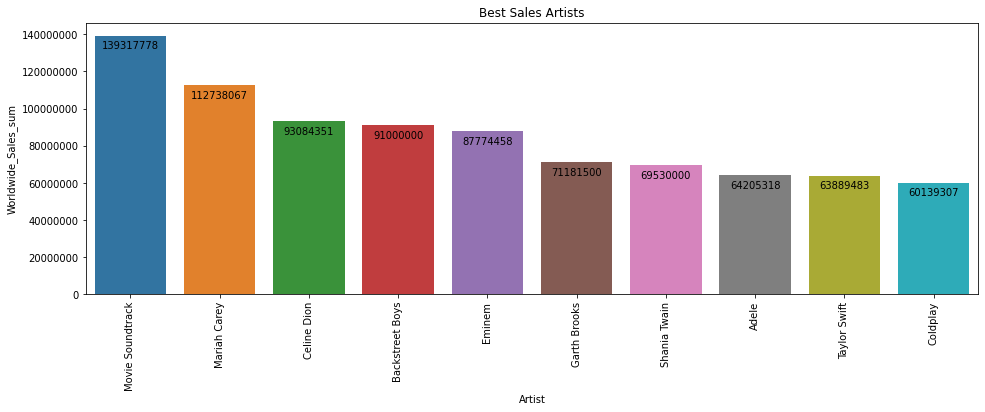

In [10]:
#bar_templete(title, df_data, x_data, y_data, fontsize, color, height, rotation)
bar_templete("Best Sales Artists",
             Worldwide_Sales_sum_df.sort_values(by = 'Worldwide_Sales_sum', ascending=False)[:10], 
             'Artist',
             'Worldwide_Sales_sum',
             10,
             'black',
             -10,
             0
            )

In [11]:
keys = data_length['Genre'].unique()
data =data_length['Genre'].value_counts()

# Genre Pie Chart

In [12]:
import plotly.express as px

# plotly express not showing issue
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.pie(
             values=data,
             names=keys,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title= 'Best Genre Total Sales')
fig.show()

# TOP 30 Best Total Sales Album of 1990-2021

In [13]:
replace_sales = data_length['Worldwide Sales (Est.)'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype(int)

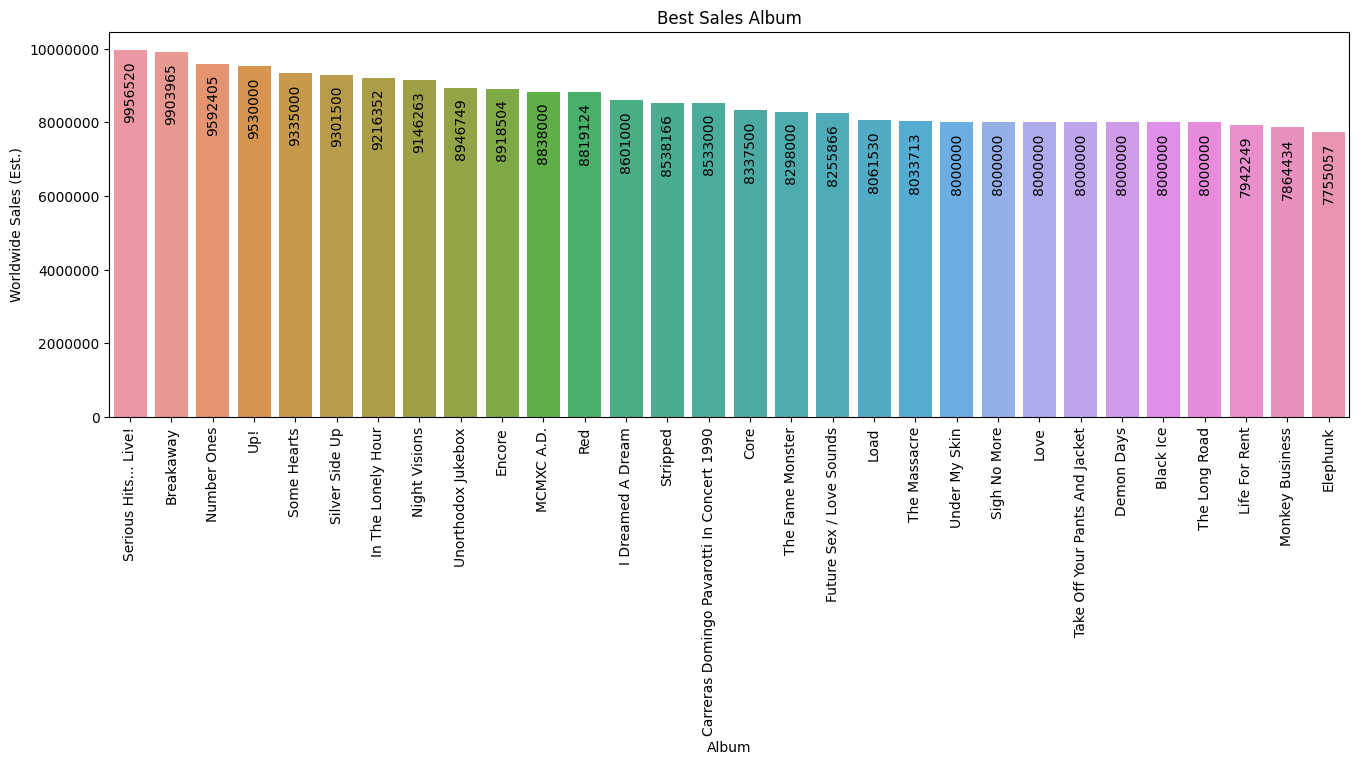

In [14]:
#bar_templete(title, df_data, x_data, y_data, fontsize, color, height, rotation)
bar_templete("Best Sales Album",
             data_length.sort_values(by = 'Worldwide Sales (Est.)', ascending=False)[:30], 
             'Album', 
             replace_sales,
             10,
             'black',
             -30,
             90
            )


# Genre Times Violin Chart

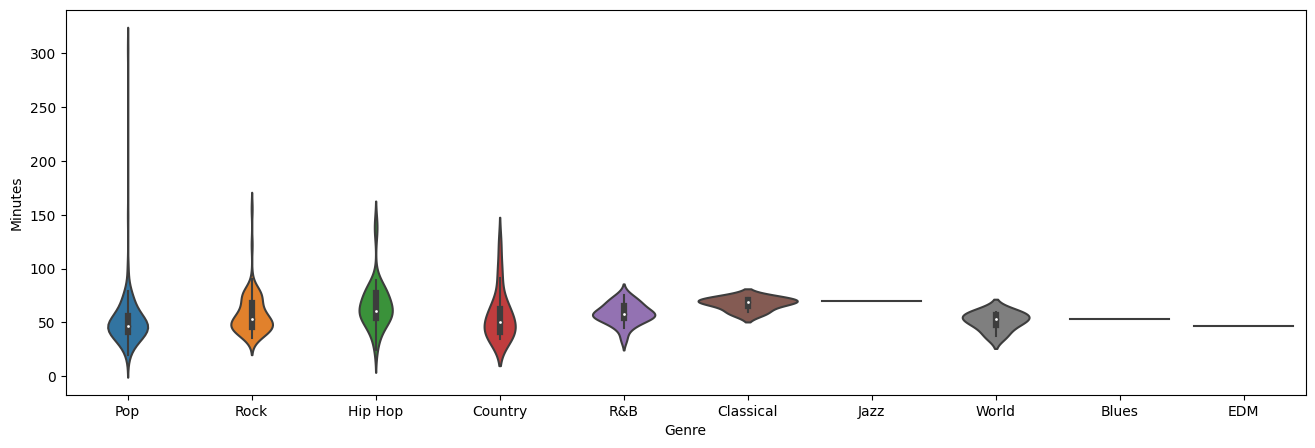

In [15]:
plt.figure(figsize=(16,5))

violin =  sns.violinplot(data = data_length , x = "Genre" , y = "Minutes")

plt.show(violin)